In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Read in the data, note: 'education-num' is a proxy for number of years in education
dataTypes = {'age':np.uint8,'workclass':'category', 'fnlwgt':np.uint32, 'education':'category', 'education-num':np.uint8,
             'marital-status':'category', 'occupation':'category', 'relationship':'category', 'race':'category', 'sex':'category', 
             'capital-gain':np.uint32, 'capital-loss':np.uint32, 'hours-per-week':np.uint8, 'native-country':'category',
             'class':'category'}

# Note, we have a mixture of categorical and numerical data, 'X' commonly referred to as 
# the 'Design Matrix' which contains our 'predictors/features'
X_train = pd.read_csv('trainingData/au_train.csv', dtype=dataTypes, skipinitialspace=True, engine='c')
y_train = X_train['class'].to_numpy()
X_train.drop(columns=['class'],inplace=True)
# print(X_train.info())
# print(y_train.info())
# print(X_train.isnull().sum())
# print(X_train.isna().sum


X_test = pd.read_csv('testingData/au_test.csv', dtype=dataTypes, skipinitialspace=True ,engine='c')
y_test = X_test['class'].to_numpy()
X_test.drop(columns=['class'],inplace=True)



# Preprocess categorical `class` data of training and test set, it is just a numpy array, nothing fancy
y_train = np.where(y_train=='>50K',1,0)
y_test = np.where(y_test=='>50K',1,0)
# print(X_test.info())
# print(y_test.info())
# print(X_test.isnull().sum())
# print(X_test.isna().sum())

# Checkout the data, see some categorical features that are missing labels (i.e '?')

In [ ]:
# Check for unlabeled categorical features in X_train
# print(sorted(list(X_train['workclass'].unique())))
# print(sorted(list(X_train['occupation'].unique())))
print(sorted(list(X_train['native-country'].unique())))

# Check for unlabeled target (binary) in y_train (ITS GOOD)
# print(list(y_train['class'].unique()))

print('\n\n')

# Check for unlabeled categorical features in X_test
# print(sorted(list(X_test['workclass'].unique())))
# print(sorted(list(X_test['occupation'].unique())))
print(sorted(list(X_test['native-country'].unique())))

# Check for unlabeled target (binary) in y_test (ITS GOOD)
# print(list(y_train['class'].unique()))

# We have heterogeneous data (mixed numerical and categorical data), *scikit-learn* requires explicit conversion of categorical features to numeric values (**preprocessing**).
1. Possibility to scale the numeric features (helpful sometimes)
2. Categorical data will be *ordinally encoded*

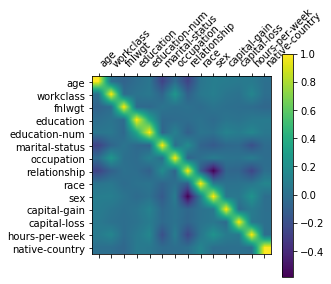

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

# Create the preprocessing pipelines for categorical data of training set.
train_categorical_features = [catFeat for catFeat in X_train.select_dtypes(include="category")]
enc = OrdinalEncoder(categories='auto')
enc.fit(X_train[train_categorical_features[:]])
X_train[train_categorical_features[:]] = enc.transform(X_train[train_categorical_features[:]])

# Create the preprocessing pipelines for categorical data of test set.
test_categorical_features = [catFeat for catFeat in X_test.select_dtypes(include="category")]
enc = OrdinalEncoder(categories='auto')
enc.fit(X_test[test_categorical_features[:]])
X_test[test_categorical_features[:]] = enc.transform(X_test[test_categorical_features[:]])

# Plot correlation matrix
corr = X_train.corr()
labelNames = list(X_train.columns.values)

im = plt.matshow(corr,cmap='viridis',interpolation='bilinear')
plt.xticks(np.arange(corr.shape[1]),labels=labelNames,rotation=45,va='bottom',ha='left')
plt.yticks(np.arange(corr.shape[0]),labels=labelNames)
plt.colorbar(im)

# The DataFrames 'class' column is non-numeric, append a new column 'class-num' to serve as a numerical proxy value

trainingData['class-num'] = trainingData['class'].apply(lambda x: 0 if x == '<=50K' else( 1 if x == '>50K' else -1))
testingData['class-num'] = testingData['class'].apply(lambda x: 0 if x == '<=50K' else( 1 if x == '>50K' else -1))

# The data has been preprocessed, lets play with some models

## Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('lr score:',lr_clf.score(X_train,y_train))


lr score: 0.2620297744747876


## Stochastic Gradient Descent (SGD)

In [64]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=50000,  random_state=42)
# Create boolean masks of target vector
y_train_over50 = (y_train == 1)
y_test_over50 = (y_test == 1)
sgd_clf.fit(X_train,y_train_over50)
sgd_pred = sgd_clf.predict(X_test)
print(sgd_pred)
print('SGD score:',sgd_clf.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train, y_train, cv=3,scoring='accuracy'))

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_over50, cv=3)

# Construct the confusion matrix
from sklearn.metrics import confusion_matrix
CM1 = confusion_matrix(y_train_over50, y_train_pred)
print(CM1)


[ True  True  True ...  True  True  True]
SGD score: 0.0
[0.24083287 0.24083287 0.79489542]
[[ 8134 16586]
 [ 2120  5721]]


## Support Vector Machines (SVM)

In [49]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
print('SVM score:',svm_clf.score(X_test,y_test))

SVM score: 0.9620416436336834


# The DataFrames 'class' column is non-numeric, append a new column 'class-num' to serve as a numerical proxy value

In [ ]:
trainingData['class-num'] = trainingData['class'].apply(lambda x: 0 if x == '<=50K' else( 1 if x == '>50K' else -1))
testingData['class-num'] = testingData['class'].apply(lambda x: 0 if x == '<=50K' else( 1 if x == '>50K' else -1))

# Try 'groupby' method and see if we can establish some patterns
## sex

In [ ]:
groupbySex = trainingData.groupby('sex')
colorDict = {'Male':'b','Female':'r'}
for sex,group in groupbySex:
#     print(sex)
#     print(group.describe(),'\n\n')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    fig.patch.set_facecolor('xkcd:gray')
    fig.suptitle(sex)
    group.plot.scatter(ax=axes[0,0],x='education-num', y='capital-gain', c=colorDict[str(sex)], label=sex, legend=True, alpha=.1)
    group.plot.hexbin(ax=axes[0,1],x='education-num', y='capital-gain', gridsize=15,cmap='viridis',norm=LogNorm())
    group.plot.scatter(ax=axes[1,1],x='education-num', y='capital-gain', s=group['hours-per-week']*2)

## race

In [ ]:
groupRace = trainingData.groupby('race')
for race,group in groupRace:
    print(race)
    print(group.describe(),'\n\n')

## education-num

In [ ]:
groupEdu = trainingData.groupby('education-num')
for edu,group in groupEdu:
    print(edu)
    print(group.describe(),'\n\n')